In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem as Chem

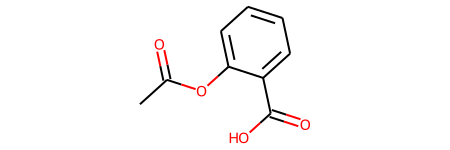

In [2]:
# SMILES of aspirin
aspirin = 'CC(=O)Oc1ccccc1C(=O)O'
# aspirin to mol
mol = Chem.MolFromSmiles(aspirin)
mol

In [3]:
# Calculate the molecular weight of aspirin
Chem.CalcExactMolWt(mol)

180.042258736

In [4]:
# Print atomic symbol and indices of atoms in molecule mol
for atom in mol.GetAtoms():
    print(atom.GetSymbol(), atom.GetIdx())

C 0
C 1
O 2
O 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
O 11
O 12


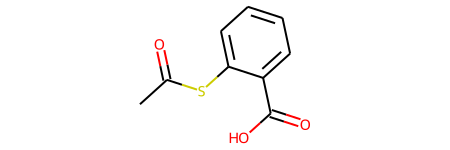

In [11]:
# Create a new molecule and replace the atom at index 0 with a new atom
new_mol = Chem.RWMol(mol)
new_mol.ReplaceAtom(3, Chem.Atom('S'))
new_mol

In [12]:
def create3Dmol(mol):
    """Create a 3D molecule from a 2D molecule"""
    # Add Explicit Hydrogens
    mol = Chem.AddHs(mol)
    # Create a 3D molecule from a 2D molecule
    Chem.EmbedMolecule(mol)
    # Optimize the geometry of the molecule
    Chem.MMFFOptimizeMolecule(mol)
    return mol

In [13]:
create3Dmol(new_mol)

[15:25:20] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 299 in file /Users/runner/miniforge3/conda-bld/rdkit_1657061307449/work/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 299 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2022.03.4
	BOOST: 1_74


## Obviously, this is not an adequate way to create new_mols; quick fix and sanitize the mol

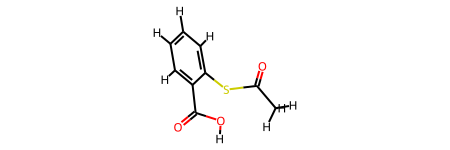

In [18]:
# Sanitize new_mol
Chem.SanitizeMol(new_mol)
create3Dmol(new_mol)
